# US Visa Approval Prediction

Life cycle of ML Project
1. Understanding problem statement
2. Data collection
3. Exploratory data analysis
4. Data cleaning
5. Data pre-processing
6. Model training
7. Choose best model

# Imports and Data Load

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

sns.set_style("whitegrid")
warnings.filterwarnings("ignore")

In [2]:
# load data
df = pd.read_csv("EasyVisa.csv")

# Explore data

In [3]:
# explore data
df.shape

(25480, 12)

In [4]:
# preview data
df.sample(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
15249,EZYV15250,Asia,Master's,Y,N,94336,1885,South,78306.07,Year,Y,Certified
10296,EZYV10297,Asia,High School,Y,N,1616,1987,Midwest,149907.39,Year,Y,Denied
11234,EZYV11235,Asia,Master's,N,N,2237,1989,Midwest,106140.97,Year,Y,Certified
10184,EZYV10185,Asia,Master's,Y,N,2526,2004,Northeast,86908.59,Year,N,Certified
16821,EZYV16822,Asia,Bachelor's,Y,N,4793,2005,West,31991.92,Year,Y,Denied


In [5]:
# features of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [6]:
# statistical descriptions
df.describe(percentiles=[0.01, 0.25, .5, .75, .99])

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
1%,52.000000,1837.000000,106.046900
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
99%,102767.000000,2014.000000,238215.450000
max,602069.000000,2016.000000,319210.270000


In [7]:
# missing values
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [8]:
# df.drop(['case_id'], axis=1)

In [9]:
# segregate features by dtype
num_features = df.select_dtypes(exclude=['object']).columns.tolist()
cat_features = df.select_dtypes(include=['object']).columns.tolist()

# confirm
print(f"Total number of features in dataset: {len(df.columns)}")
print(f"> We have {len(num_features)} numerical features: {num_features}")
print(f"> We have {len(cat_features)} categorical features: {cat_features}")

Total number of features in dataset: 12
> We have 3 numerical features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
> We have 9 categorical features: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [10]:
# analyze categorical data
for f in cat_features:
    print(df[f].value_counts(normalize=True).round(4)*100)
    print("- - -")

case_id
EZYV01       0.0
EZYV16995    0.0
EZYV16993    0.0
EZYV16992    0.0
EZYV16991    0.0
            ... 
EZYV8492     0.0
EZYV8491     0.0
EZYV8490     0.0
EZYV8489     0.0
EZYV25480    0.0
Name: proportion, Length: 25480, dtype: float64
- - -
continent
Asia             66.17
Europe           14.65
North America    12.92
South America     3.34
Africa            2.16
Oceania           0.75
Name: proportion, dtype: float64
- - -
education_of_employee
Bachelor's     40.16
Master's       37.81
High School    13.42
Doctorate       8.60
Name: proportion, dtype: float64
- - -
has_job_experience
Y    58.09
N    41.91
Name: proportion, dtype: float64
- - -
requires_job_training
N    88.4
Y    11.6
Name: proportion, dtype: float64
- - -
region_of_employment
Northeast    28.24
South        27.54
West         25.85
Midwest      16.90
Island        1.47
Name: proportion, dtype: float64
- - -
unit_of_wage
Year     90.12
Hour      8.47
Week      1.07
Month     0.35
Name: proportion, dtype: float

Observations
- `case_id` feature is a unique ID, therefore, it can be dropped.
- `continent` feature is highly biased towards `Asia`. Therefore, we can combine other categories to form a single category.
- `unit_of_wage` seems to be an important column as most of them are yearly contracts.

## Univartiate Analysis
Understand the distribution of values for a single feature.

### Numerical Features

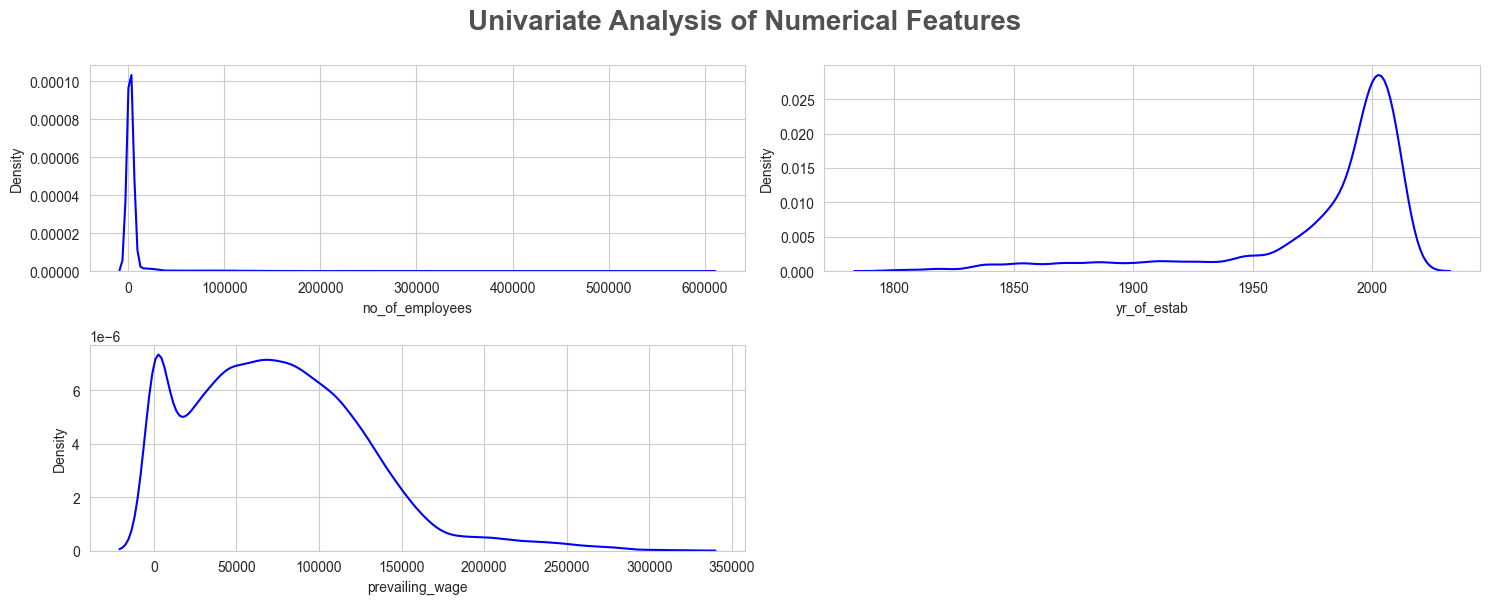

In [11]:
# kdeplot
plt.figure(figsize=(15,6))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(len(num_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[num_features[i]], color='blue')
    plt.xlabel(num_features[i])
    plt.tight_layout()

In [12]:
num_features

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

Observations
- `no_of_employees` feature is skewed, possibly due to the outliers.
- `yr_of_estab` is a discrete feature.
- `prevailing_wage` is a right-skewed distribution.

### Categorical features

In [13]:
cat_features.remove('case_id')

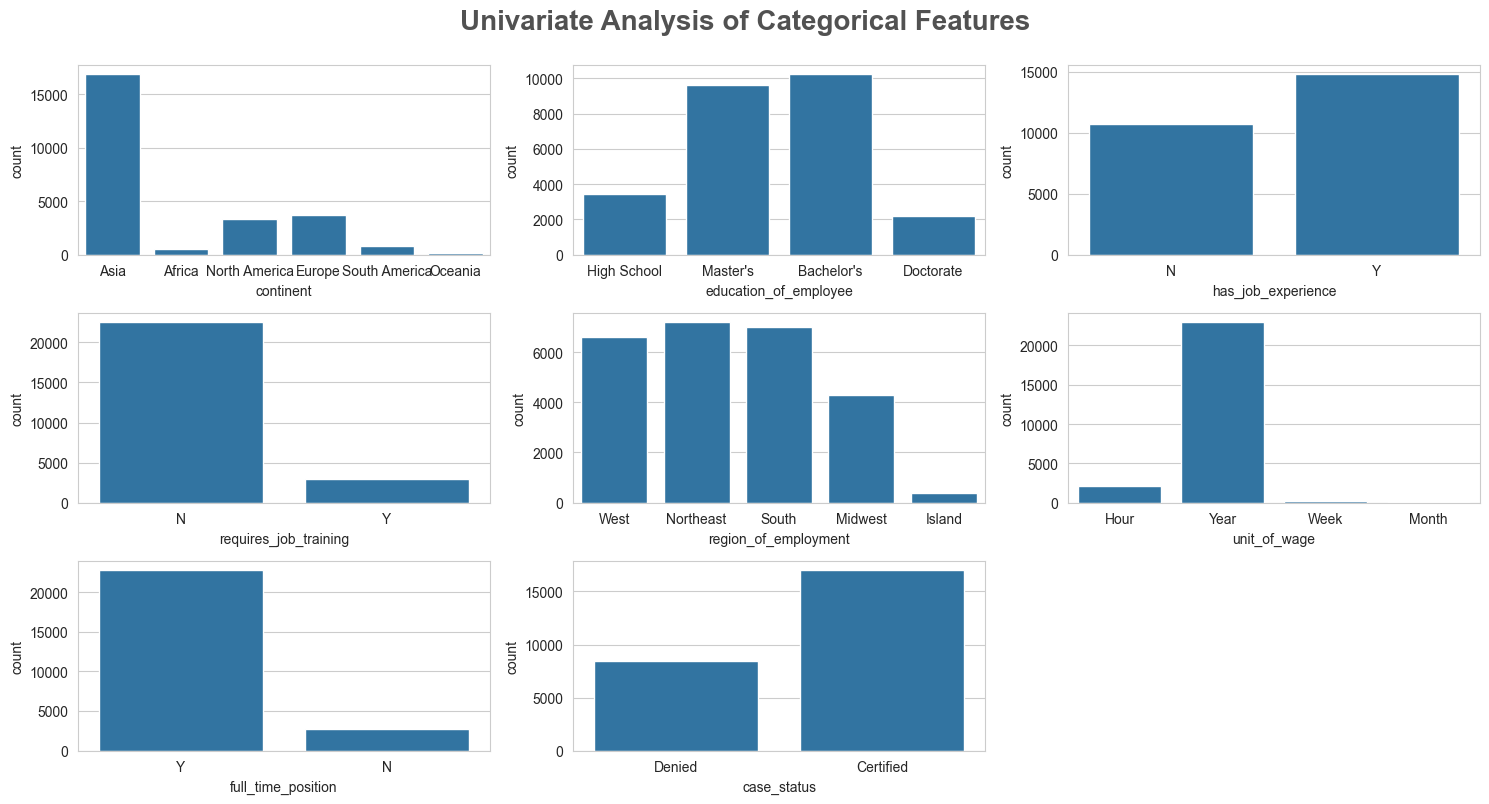

In [14]:
# categorical features
plt.figure(figsize=(15,8))
plt.suptitle("Univariate Analysis of Categorical Features", fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(len(cat_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[cat_features[i]])
    plt.xlabel(cat_features[i])
    plt.tight_layout()

Observations
- `requires_job_training`, `unit_of_wage`, `full_time_position`, `continent` features have single label dominating the feature
- rest of the features are balanced 

## Check Multiconlinearity in Numerical Features

### Chi-Squared Test ($\chi^2$)
For testing multicollinearity between features of dataset. Here we will test the correlation of categorical features with target column.
- Null hypothesis ($H_0$) : The feature is independent of the target column, .i.e., there is no correlation.
- Alternate hypothesis ($H_1$) : The feature and target column are not independent, .i.e., they are correlated.


In [15]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in cat_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail to Reject Null Hypothesis")
result = pd.DataFrame(data=[cat_features, chi2_test]).T
result.columns = ['Feature', 'Chi-Squared Test Result']
result

,Feature,Chi-Squared Test Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


Observations
- The feature `requires_job_training` fails to reject the null hypothesis, therefore, it does not correlate with the target column.

### Correlation chart for numerical features

<Axes: >

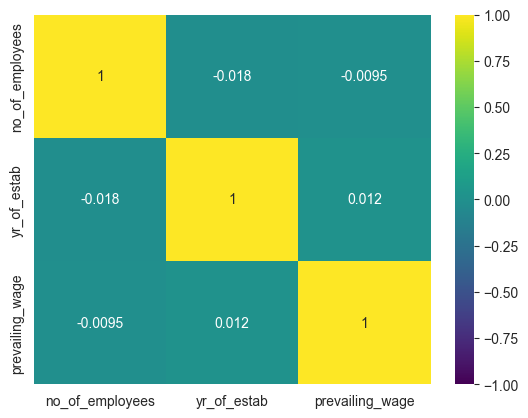

In [16]:
sns.heatmap(df[num_features].corr(), annot=True, vmin=-1, vmax=1, cmap='viridis')

## Multivariate Analysis

In [17]:
discrete_features = [f for f in num_features if (len(df[f].unique()) <= 25)]
continous_features = [f for f in num_features if (len(df[f].unique()) > 25)]

# confirm
print(f"Total number of features in dataset: {len(num_features)}")
print(f"> We have {len(discrete_features)} discrete features: {discrete_features}")
print(f"> We have {len(continous_features)} continous features: {continous_features}")

Total number of features in dataset: 3
> We have 0 discrete features: []
> We have 3 continous features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


### continous_features

In [18]:
continous_features

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

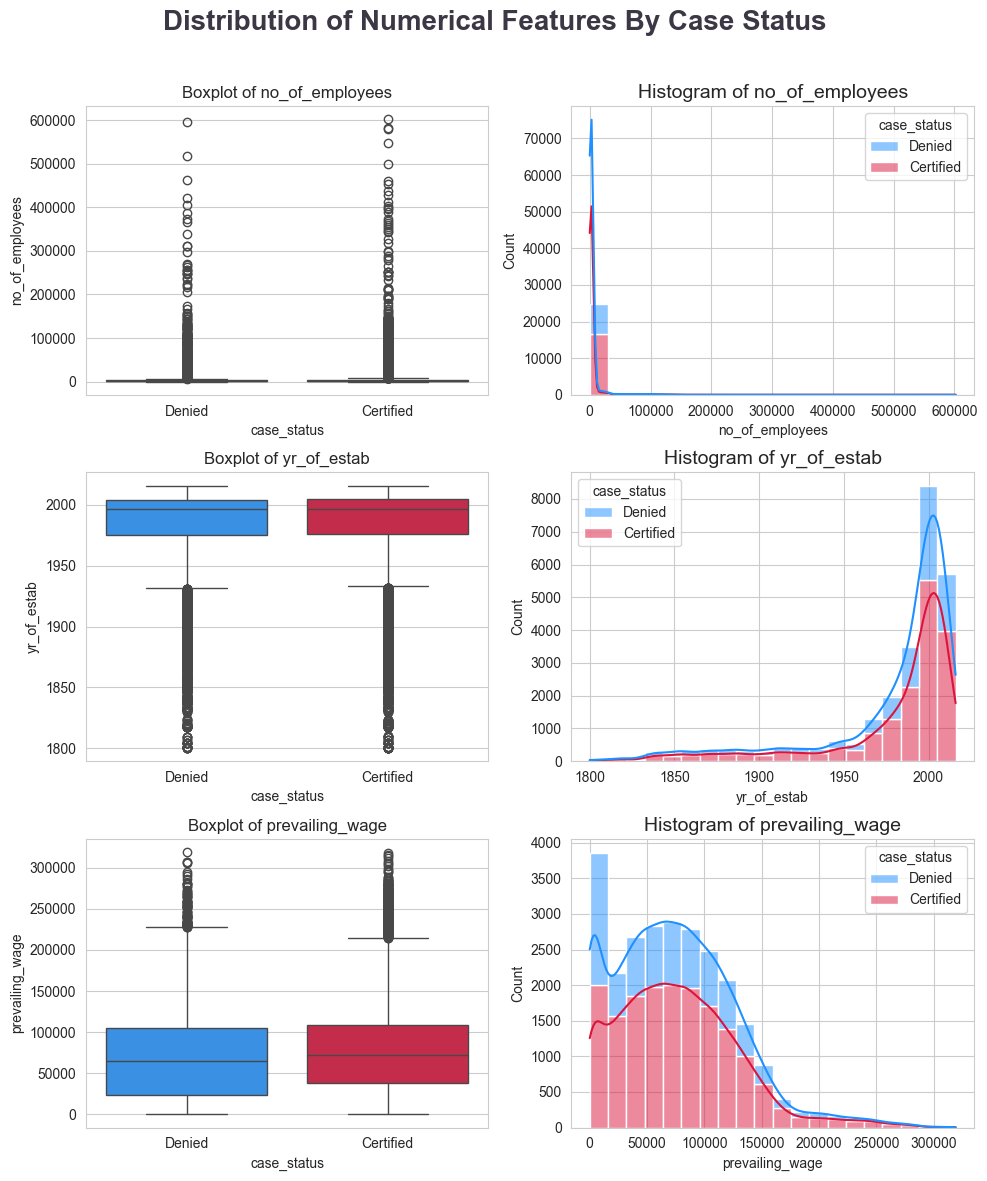

In [19]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continous_features):   
    sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig('images/multivariate_num.png')

## Initial Analysis Report
1. `no_of_employees` has many outliers and is right skewed.
2. `yr_of_estab` has many outliers and is left skewed.
3. `prevailing_wage` is right skewed with outliers above the upper bound of the box plot.
4. There are no missing values in the dataset.
5. The `case_id` column can be dropped as it is a unique identifier.
6. The `case_status` column is the target variable.
7. The categorical column need to be encoded appropriately.

## Target Feature

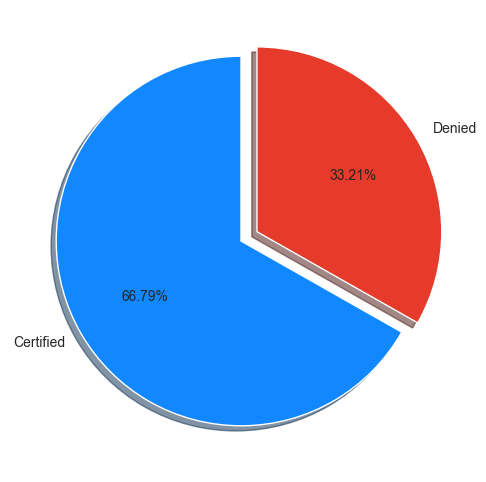

In [20]:
# pie plot
percentage = df['case_status'].value_counts(normalize=True).mul(100).round(2)
labels = percentage.index.tolist()

fig, ax = plt.subplots(figsize=(10,6))
explode = (0, 0.1)
colors = ['#1188ff', '#e63a2a']
ax.pie(percentage, labels = labels, startangle=90, autopct='%1.2f%%', explode=explode, shadow=True, colors=colors)
plt.show()

Observations
- About 2/3rd of the applications were approved
- The target variable is imbalanced

# Correlations between independent features on target variable

## `continent` vs `case_study`

In [21]:
# continent vs case_study
gp_con = df.groupby('continent')['case_status'].value_counts(normalize=True).mul(100).round(2).to_frame()
gp_con

proportion
continent     case_status            
Africa        Certified         72.05
              Denied            27.95
Asia          Certified         65.31
              Denied            34.69
Europe        Certified         79.23
              Denied            20.77
North America Certified         61.88
              Denied            38.12
Oceania       Certified         63.54
              Denied            36.46
South America Certified         57.86
              Denied            42.14

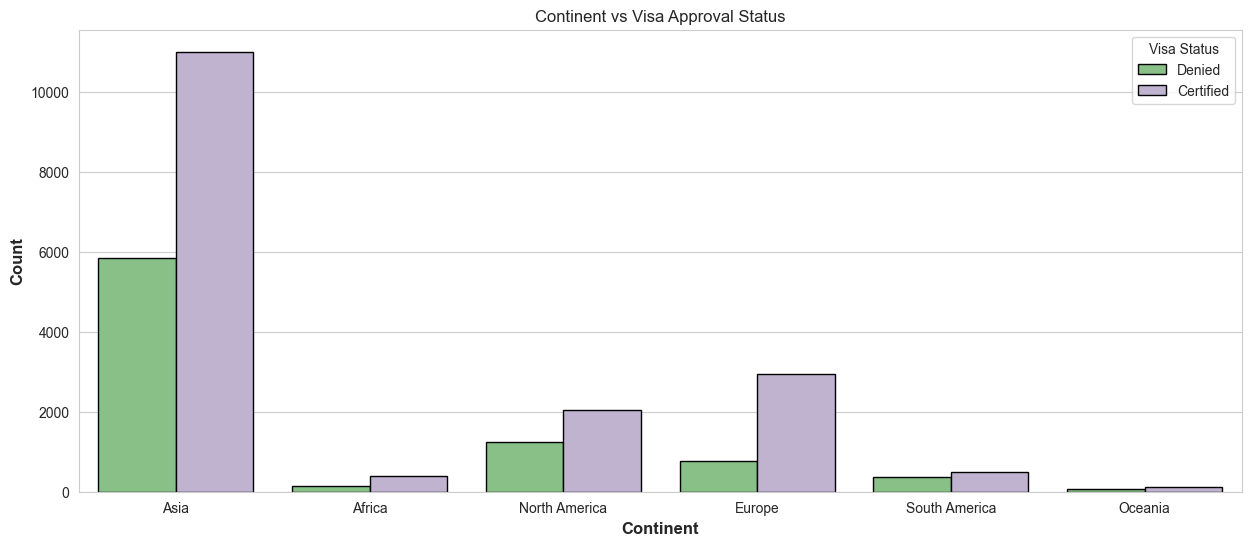

In [22]:
# plt.subplots(figszize=(15,6))
plt.figure(figsize=(15,6))
sns.countplot(x='continent', hue='case_status', data=df, ec='black', palette="Accent")
plt.title("Continent vs Visa Approval Status")
plt.xlabel('Continent', fontsize=12, weight='bold')
plt.ylabel('Count', fontsize=12, weight='bold')
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [23]:
gp_con_certi = gp_con.loc[(slice(None), 'Certified'), :].reset_index()
gp_con_certi

,continent,case_status,proportion
0,Africa,Certified,72.05
1,Asia,Certified,65.31
2,Europe,Certified,79.23
3,North America,Certified,61.88
4,Oceania,Certified,63.54
5,South America,Certified,57.86


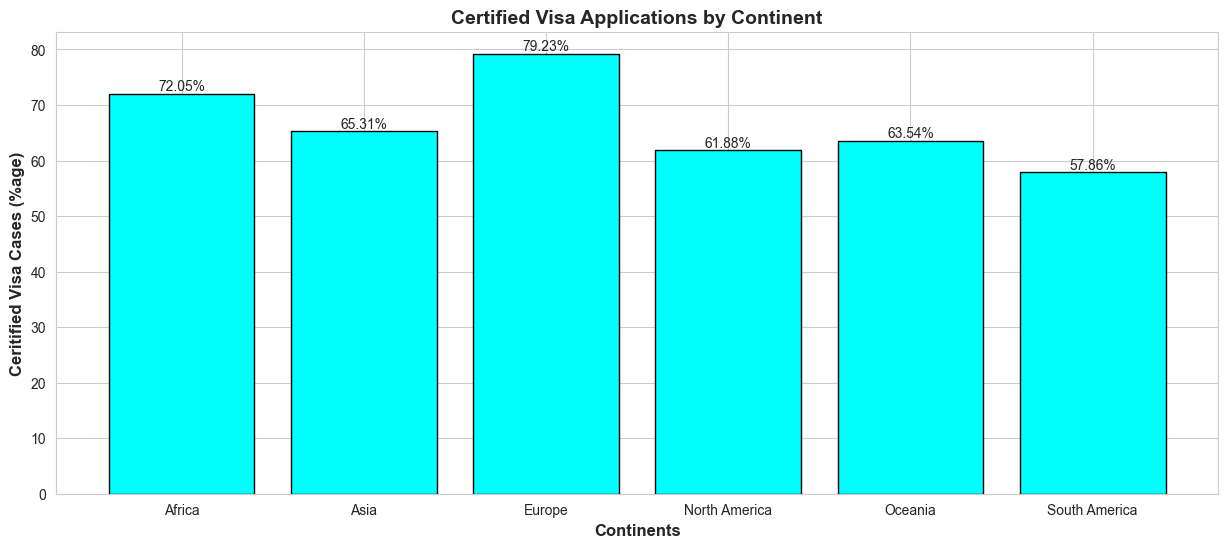

In [24]:
# plot certified percentages
plt.figure(figsize=(15,6))
bars = plt.bar(gp_con_certi['continent'], gp_con_certi['proportion'], ec='black', color="cyan")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}%', ha='center', va='bottom')
plt.title('Certified Visa Applications by Continent', fontsize=14, weight='bold')
plt.xlabel('Continents', fontsize=12, weight='bold')
plt.ylabel('Ceritified Visa Cases (%age)', fontsize=12, weight='bold')
plt.show()

Observations
- `continent` vs `case_study`
    - Most applications are coming from Asia
    - The highest probability of getting certified is in Europe followed by Africa
    - The highest probability of getting denied is in South America

## `education_of_employee` vs `case_study`

In [25]:
gp_edu = df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).mul(100).round(2).to_frame()
gp_edu

proportion
education_of_employee case_status            
Bachelor's            Certified         62.21
                      Denied            37.79
Doctorate             Certified         87.23
                      Denied            12.77
High School           Denied            65.96
                      Certified         34.04
Master's              Certified         78.63
                      Denied            21.37

Text(0, 0.5, 'Count of Applications')

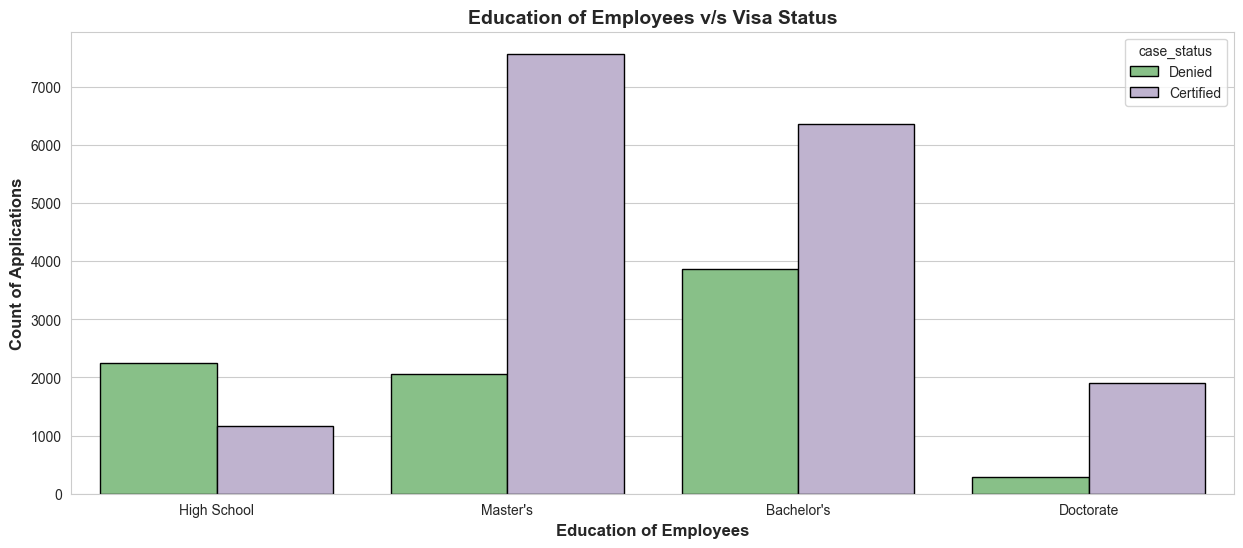

In [26]:
# barplot
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='education_of_employee', hue='case_status', ec='black', palette='Accent', )
plt.title('Education of Employees v/s Visa Status', fontsize=14, weight='bold')
plt.xlabel('Education of Employees', fontsize=12, weight='bold')
plt.ylabel('Count of Applications', fontsize=12, weight='bold')

In [27]:
df[df['case_status']=='Certified']

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


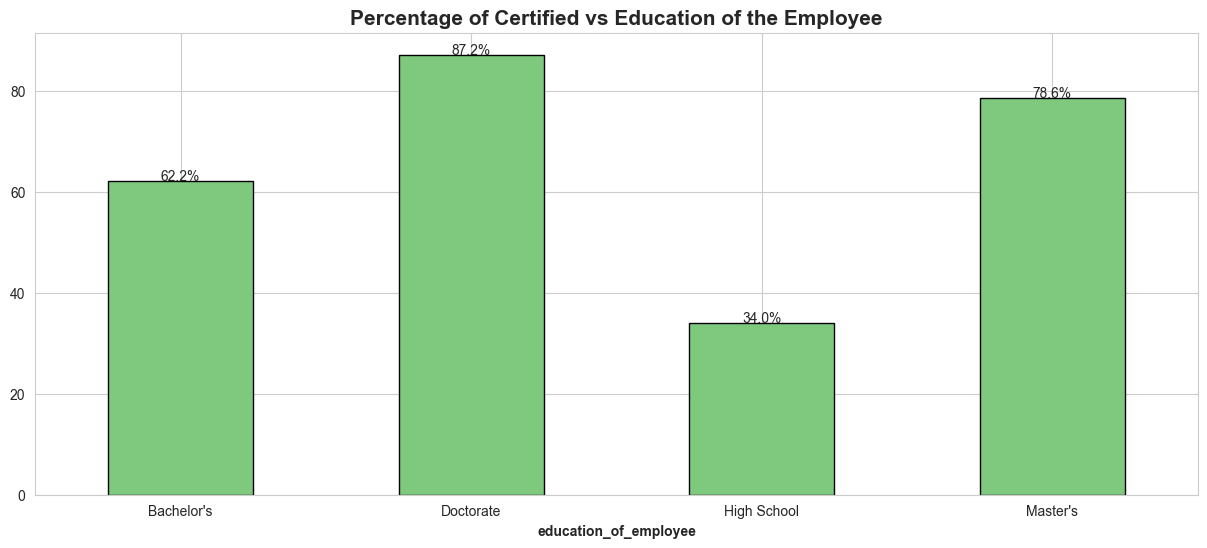

In [28]:
plt.figure(figsize=(15,6))

((df[df['case_status'].isin(['Certified'])])['education_of_employee'].value_counts().mul(100) / df['education_of_employee'].value_counts()).plot(kind='bar', stacked=True, colormap='Accent', ec='black')
plt.title('Percentage of Certified vs Education of the Employee', fontsize=15, weight='bold')
order1 = (df[df['case_status'].isin(['Certified'])])['education_of_employee'].value_counts().mul(100) / df['education_of_employee'].value_counts()
for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n, count+0.1, strt, ha='center')

plt.xlabel('education_of_employee', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

Observations
- Education status has high impact on getting Visa approval
- `Doctorate` and `Master's` graduates have higher probability of getting their visa approved

## `has_job_experience` vs `case_study`

In [29]:
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).mul(100).round(2).to_frame()

proportion
has_job_experience case_status            
N                  Certified         56.13
                   Denied            43.87
Y                  Certified         74.48
                   Denied            25.52

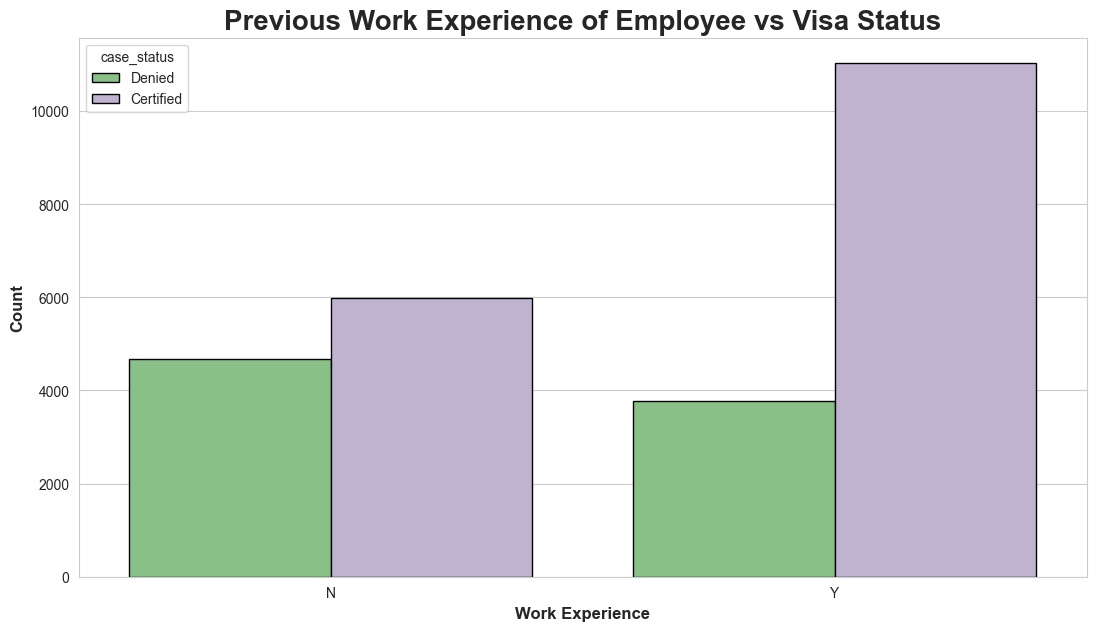

In [30]:
plt.subplots(figsize=(13,7))
sns.countplot(x='has_job_experience', hue='case_status', data=df, ec='black', palette='Accent')
plt.title('Previous Work Experience of Employee vs Visa Status', fontsize=20, weight='bold')
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience", weight='bold', fontsize=12)
plt.show()

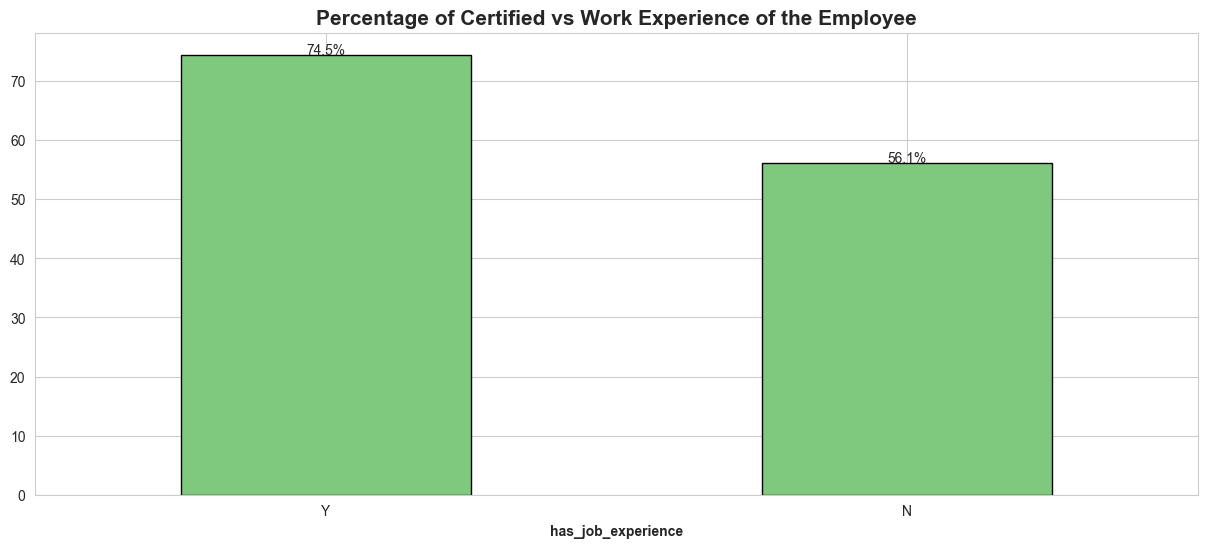

In [31]:
plt.figure(figsize=(15,6))
labl = 'has_job_experience'

((df[df['case_status'].isin(['Certified'])])[labl].value_counts().mul(100) / df[labl].value_counts()).plot(kind='bar', stacked=True, colormap='Accent', ec='black')
plt.title('Percentage of Certified vs Work Experience of the Employee', fontsize=15, weight='bold')
order1 = (df[df['case_status'].isin(['Certified'])])[labl].value_counts().mul(100) / df[labl].value_counts()
for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n, count+0.1, strt, ha='center')

plt.xlabel(labl, fontweight='bold')
plt.xticks(rotation=0)
plt.show()

Observations
- People with previous work experience has been certified 74.5% only 25.5% applicant has been denied
- People with NO previous work experience has been certified 56% and denied 43%
- Therefore, having previous work experience has a positive impact on getting visa approvals
- But the difference is not huge between freshers and experienced

## `requires_job_training` vs `case_study`

In [32]:
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).mul(100).round(2).to_frame()

proportion
requires_job_training case_status            
N                     Certified         66.65
                      Denied            33.35
Y                     Certified         67.88
                      Denied            32.12

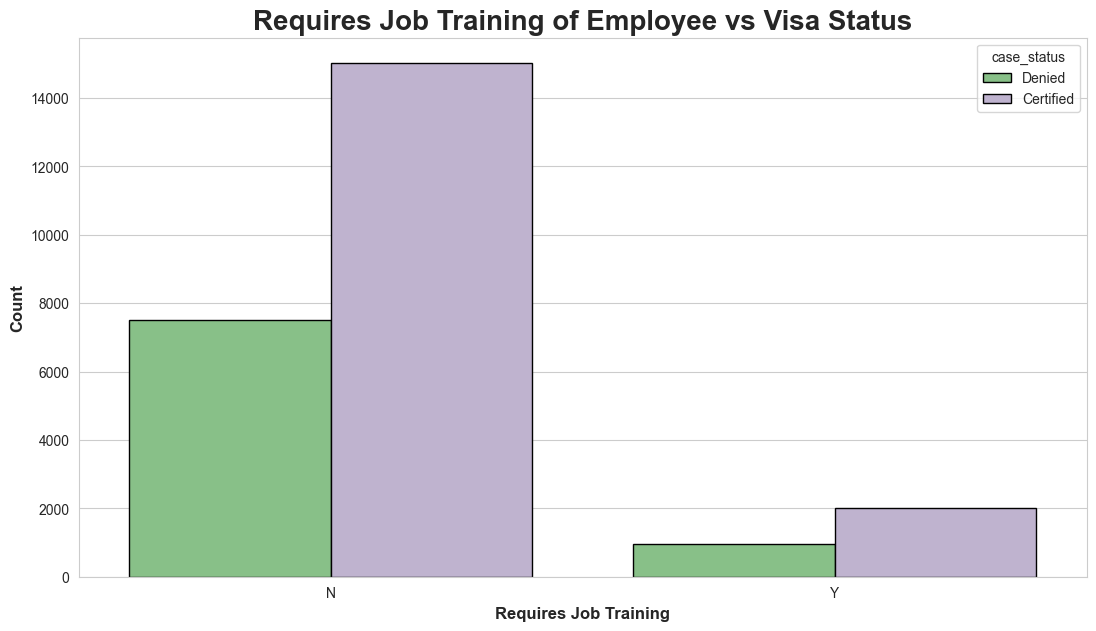

In [33]:
plt.subplots(figsize=(13,7))
sns.countplot(x='requires_job_training', hue='case_status', data=df, ec='black', palette='Accent')
plt.title('Requires Job Training of Employee vs Visa Status', fontsize=20, weight='bold')
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training", weight='bold', fontsize=12)
plt.show()

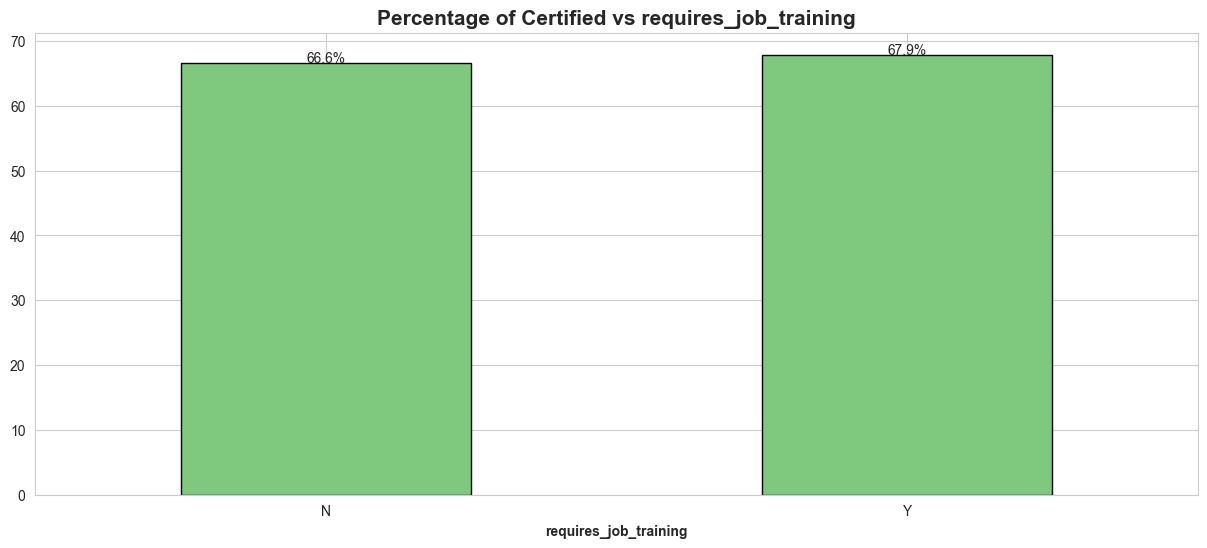

In [34]:
plt.figure(figsize=(15,6))
labl = 'requires_job_training'

((df[df['case_status'].isin(['Certified'])])[labl].value_counts().mul(100) / df[labl].value_counts()).plot(kind='bar', stacked=True, colormap='Accent', ec='black')
plt.title(f'Percentage of Certified vs {labl}', fontsize=15, weight='bold')
order1 = (df[df['case_status'].isin(['Certified'])])[labl].value_counts().mul(100) / df[labl].value_counts()
for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n, count+0.1, strt, ha='center')

plt.xlabel(labl, fontweight='bold')
plt.xticks(rotation=0)
plt.show()

Observations
- If employee requires job training and it doesn't have any effect on Visa status
- 88% of applicant don't require job training
- 63% of people don't want job training got visa approvals
- For employees who require job training, 67% people got visa approved
- As per the chi-square test, this feature has not much importance on the target variable

## `no_of_employees` vs `case_study`

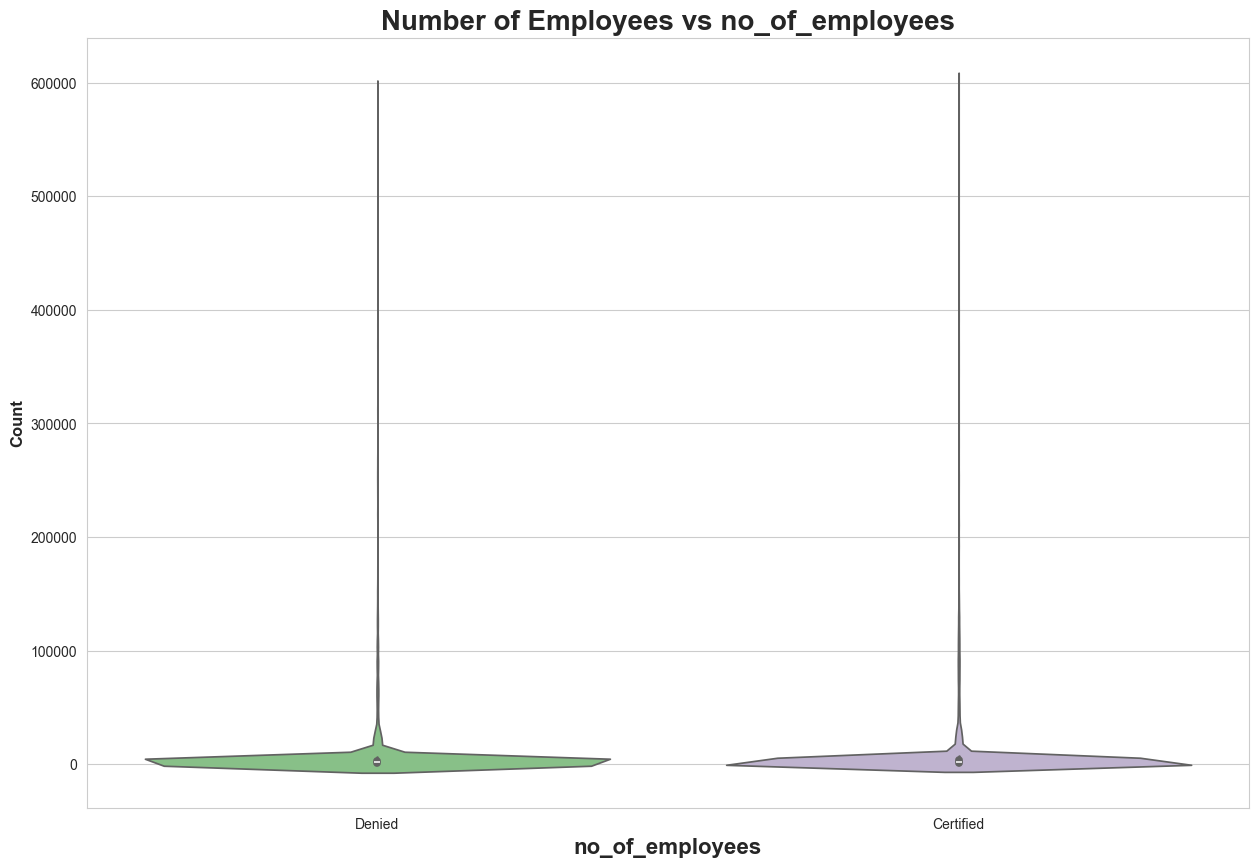

In [35]:
labl = 'no_of_employees'

plt.subplots(figsize=(15,10))
sns.violinplot(x='case_status', y=labl, data=df, palette='Accent')
plt.title(f"Number of Employees vs {labl}", weight='bold', fontsize=20)
plt.ylabel("Count", weight='bold', fontsize=12)
plt.xlabel(labl, weight='bold', fontsize=16)
plt.ylim()
plt.show()

Observations
- Distribution for both is similar. But there are outliers in both the classes that need to treated.

## `unit_of_wage` vs `case_study`

In [36]:
labl = 'unit_of_wage'

df.groupby(labl)['case_status'].value_counts(normalize=True).mul(100).round(2).to_frame()

proportion
unit_of_wage case_status            
Hour         Denied            65.37
             Certified         34.63
Month        Certified         61.80
             Denied            38.20
Week         Certified         62.13
             Denied            37.87
Year         Certified         69.89
             Denied            30.11

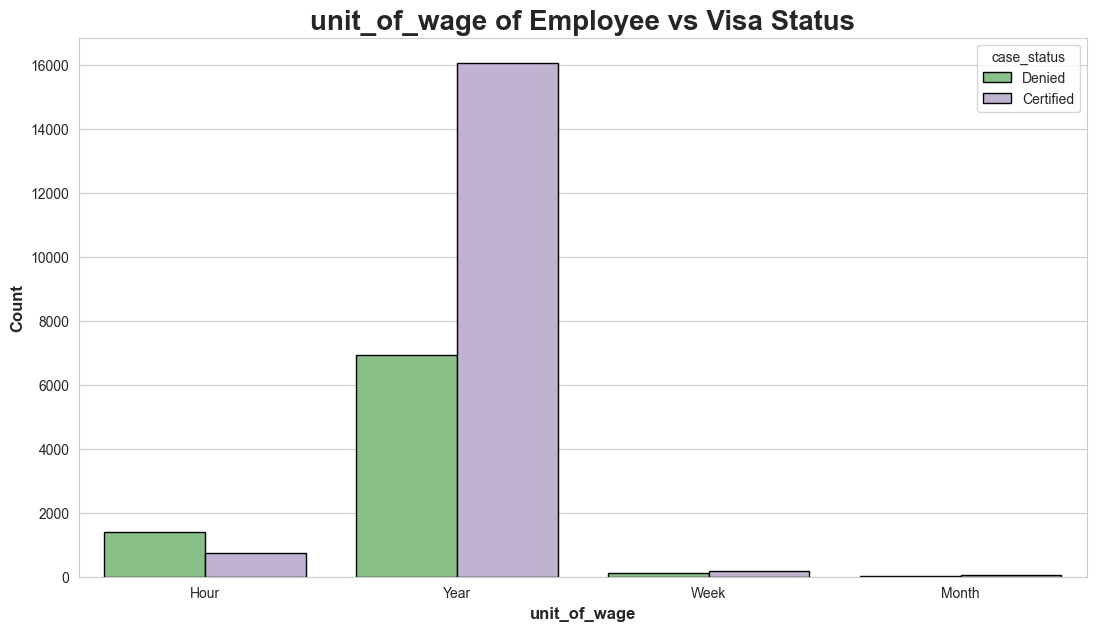

In [37]:
plt.subplots(figsize=(13,7))
sns.countplot(x=labl, hue='case_status', data=df, ec='black', palette='Accent')
plt.title(f'{labl} of Employee vs Visa Status', fontsize=20, weight='bold')
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel(labl, weight='bold', fontsize=12)
plt.show()

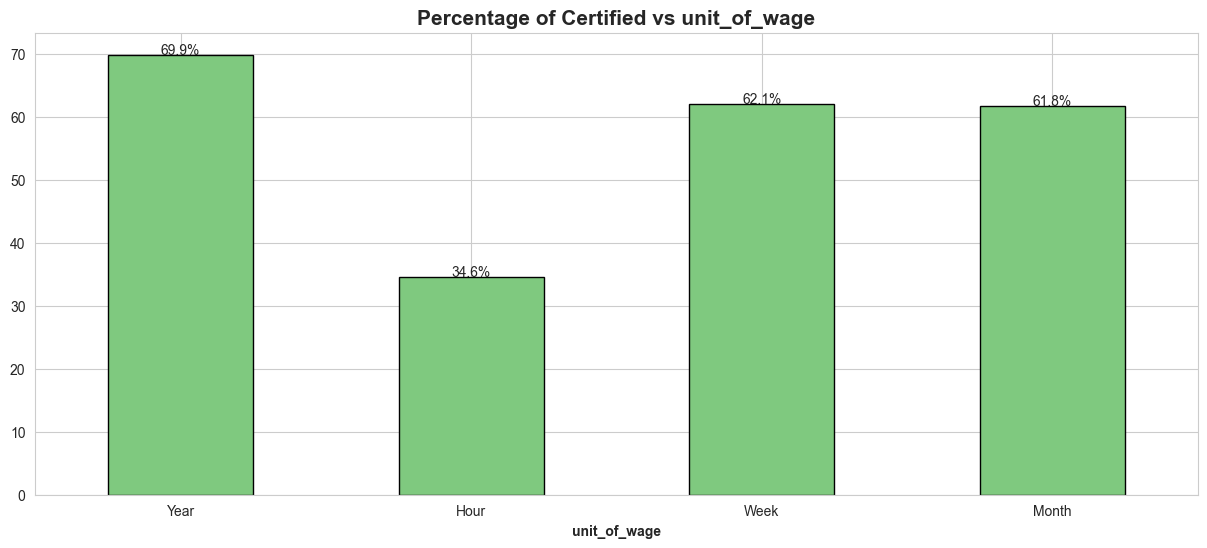

In [38]:
plt.figure(figsize=(15,6))
labl = 'unit_of_wage'

((df[df['case_status'].isin(['Certified'])])[labl].value_counts().mul(100) / df[labl].value_counts()).plot(kind='bar', stacked=True, colormap='Accent', ec='black')
plt.title(f'Percentage of Certified vs {labl}', fontsize=15, weight='bold')
order1 = (df[df['case_status'].isin(['Certified'])])[labl].value_counts().mul(100) / df[labl].value_counts()
for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n, count+0.1, strt, ha='center')

plt.xlabel(f"{labl}", fontweight='bold')
plt.xticks(rotation=0)
plt.show()

Observations
- For employees who applied for hourly pay 65% of them were denied
- Yearly unit wage application were accepted for 69% and denied for 31% of the time
- There is a higher chance of yearly contract than other and immediately followed by week and month

## `region_of_employment` vs `case_study`

In [39]:
labl = 'region_of_employment'

df.groupby(labl)['case_status'].value_counts(normalize=True).mul(100).round(2).to_frame()

proportion
region_of_employment case_status            
Island               Certified         60.27
                     Denied            39.73
Midwest              Certified         75.53
                     Denied            24.47
Northeast            Certified         62.90
                     Denied            37.10
South                Certified         70.02
                     Denied            29.98
West                 Certified         62.25
                     Denied            37.75

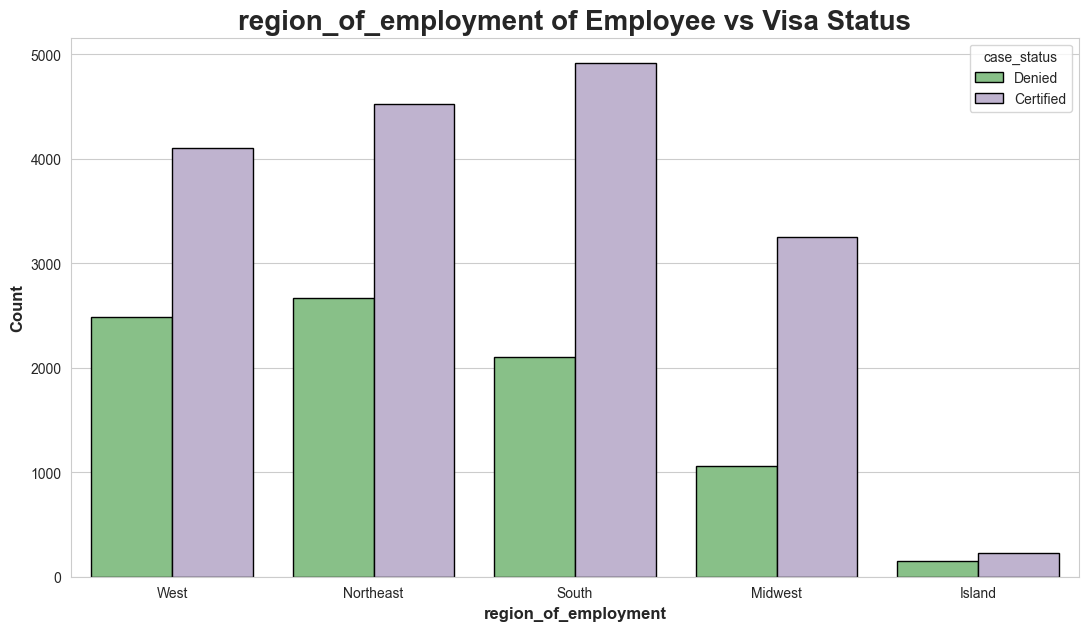

In [40]:
plt.subplots(figsize=(13,7))
sns.countplot(x=labl, hue='case_status', data=df, ec='black', palette='Accent')
plt.title(f'{labl} of Employee vs Visa Status', fontsize=20, weight='bold')
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel(labl, weight='bold', fontsize=12)
plt.show()

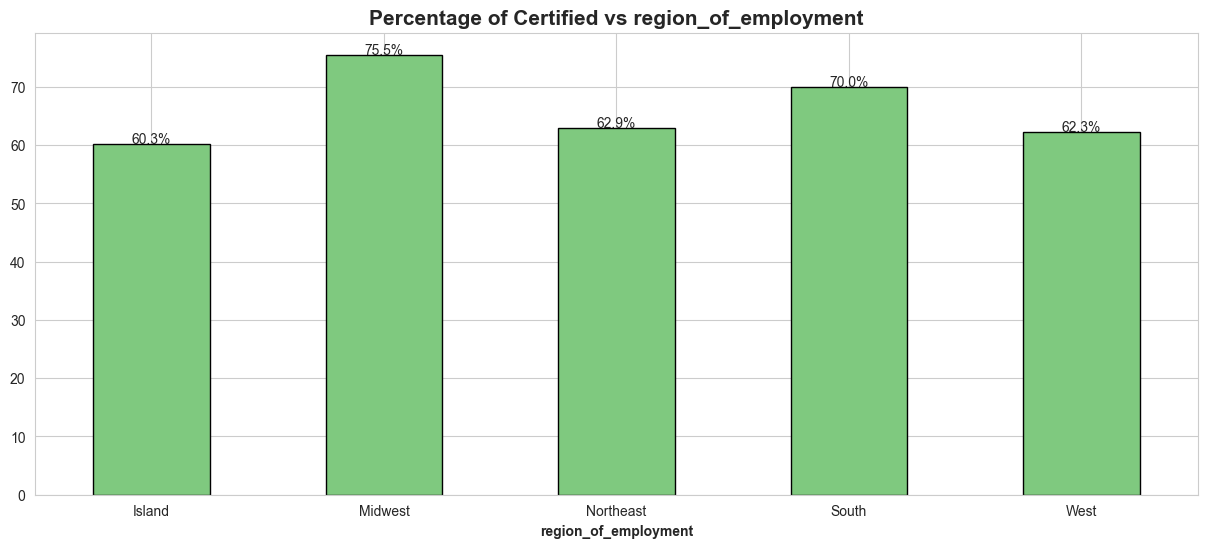

In [41]:
plt.figure(figsize=(15,6))

((df[df['case_status'].isin(['Certified'])])[labl].value_counts().mul(100) / df[labl].value_counts()).plot(kind='bar', stacked=True, colormap='Accent', ec='black')
plt.title(f'Percentage of Certified vs {labl}', fontsize=15, weight='bold')
order1 = (df[df['case_status'].isin(['Certified'])])[labl].value_counts().mul(100) / df[labl].value_counts()
for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n, count+0.1, strt, ha='center')

plt.xlabel(f"{labl}", fontweight='bold')
plt.xticks(rotation=0)
plt.show()

## `prevailing_wage` vs `case_study`

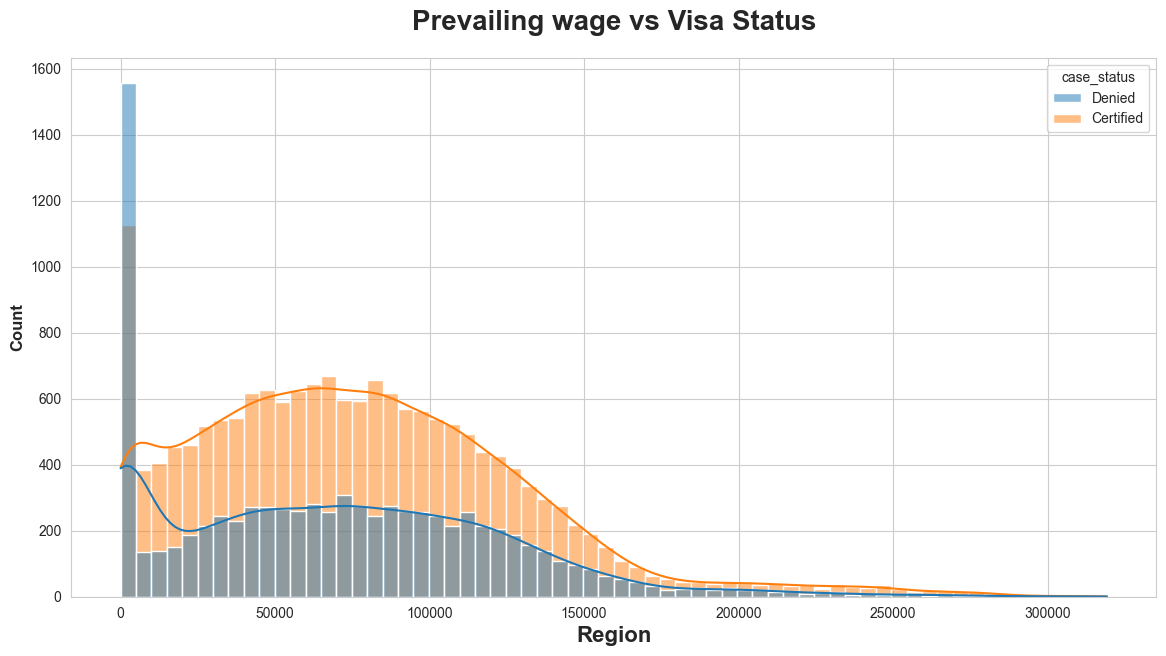

In [45]:
# KDE plot
plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage", hue="case_status", data=df, kde=True)
plt.title("Prevailing wage vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

Observations
- The distributions of both the classes are same but requires outlier treatment

# Final Report
- `case_id` column should be dropped
- `requires_job_training` column can be dropped as it does not have much impact on the target variable
- `no_of_employees`, `prevailing_wage` columns have outliers that require appropriate treatment
- `continent` column has few unique values with very less count, which can be made as others
- Target column `case_status` is imbalanced and should be handled before model building